# Obtaining the MNIST dataset

In [18]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", as_frame=False)

In [19]:
X, y = mnist.data, mnist.target

In [20]:
print(f"Shape of the training data: {X.shape}")

Shape of the training data: (70000, 784)


In [21]:
# Utility function to print an image from the dataset
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

In [22]:
random_digit_idx = 123
random_digit = X[random_digit_idx]
print(f"random_digit looks like this: {random_digit.shape}")
print("There is one row 784 values. Each value represents the intensity of a specific pixel.")

random_digit looks like this: (784,)
There is one row 784 values. Each value represents the intensity of a specific pixel.


The image looks like the below, and based on the label it is actually a 7


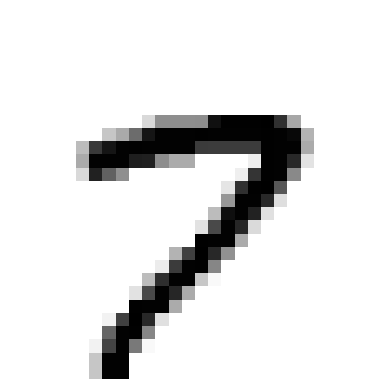

In [23]:
plot_digit(random_digit)
print(f"The image looks like the below, and based on the label it is actually a {y[123]}")

In [24]:
# Splitting into training and test set
# MNIST automatically handles the shuffling and any stratification by default
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier (7 or Not 7)

In [25]:
y_train_7 = (y_train == '7')
print(y_train_7.shape) # we see that it maintains the same shape, but just has false 
# for every instance that is not a 7

idx_7 = []
idx_not_7 = []
for i in range(len(y_train_7)):
    if y_train_7[i] == True:
        idx_7.append(i)
    else:
        idx_not_7.append(i)

print(f"Total number of 7s: {len(idx_7)}")
print(f"Total number of not 7s: {len(idx_not_7)}")

(60000,)
Total number of 7s: 6265
Total number of not 7s: 53735


### How a Stochastic Gradient (SGD) classifier works
- Computes a score based on a decision function.
- If that score is greater than some threshold, it assigns the instance to the positive class. 
- Otherwise, it assigns the negative class.

In [26]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_7)
# 7 will be the positive class 

SGDClassifier(random_state=42)

In [30]:
# Testing if the model can correctly identify our random digit
print(f"The model identifies our random_digit as:\
 {'7' if sgd_clf.predict([random_digit]) == False else 'Not 7.'}")

print(f"The random digit is actually a {y_train[random_digit_idx]}")




The model identifies our random_digit as: Not 7.
The random digit is actually a 7
